In [6]:
import pandas as pd
from sklearn import tree
from sklearn import model_selection
from graphviz import Source
import graphviz
from sklearn.preprocessing import LabelEncoder

In [7]:
data = pd.read_csv(r"C:\Users\zhouy\Desktop\数据科学技术与应用\期末大论文\df_pca.csv")
data.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Income,Time
0,0,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Divorced,No,5933.07,37.49
1,0,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,Divorced,No,10396.98,62.46
2,1,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Yes,6013.26,36.48


In [11]:
data = data.drop('Gender',axis=1)

### LabelEncoder特征编码

In [12]:
T=LabelEncoder() #初始化
data["BusinessTravel"]=T.fit_transform(data["BusinessTravel"])
data["Department"]=T.fit_transform(data["Department"])
data["EducationField"]=T.fit_transform(data["EducationField"])

data["JobRole"]=T.fit_transform(data["JobRole"])
data["MaritalStatus"]=T.fit_transform(data["MaritalStatus"])
data["OverTime"]=T.fit_transform(data["OverTime"])

In [13]:
data.head(3)

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime,Income,Time
0,0,2,1,1,4,0,0,5933.07,37.49
1,0,1,1,1,4,0,0,10396.98,62.46
2,1,1,1,1,2,2,1,6013.26,36.48


In [14]:
#取data前4列数据作为特征属性值,最后一列作为分类值
X = data.iloc[ :, 1: ].values.astype(float)
y = data.iloc[ :, 0].values.astype(int)

In [15]:
#训练模型，预测样本分类
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.score(X,y)#不能说明模型就很好

1.0

In [16]:
#在测试集上进行评价
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=1)
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=4)
#clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Performance on training set:", clf.score(X_train, y_train) )
print("Performance on test set:", clf.score(X_test, y_test) )

Performance on training set: 0.8883116883116883
Performance on test set: 0.793939393939394


In [17]:
#评估分类器性能,还计算混淆矩阵，Precision 和 Recall
predicted_y = clf.predict(X_test)
from sklearn import metrics
print("分类报告：")
print(metrics.classification_report(y_test, predicted_y))
print('混淆矩阵（Confusion matrix:）' )
print( metrics.confusion_matrix(y_test, predicted_y) )

分类报告：
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       268
           1       0.42      0.27      0.33        62

    accuracy                           0.79       330
   macro avg       0.63      0.59      0.61       330
weighted avg       0.77      0.79      0.78       330

混淆矩阵（Confusion matrix:）
[[245  23]
 [ 45  17]]


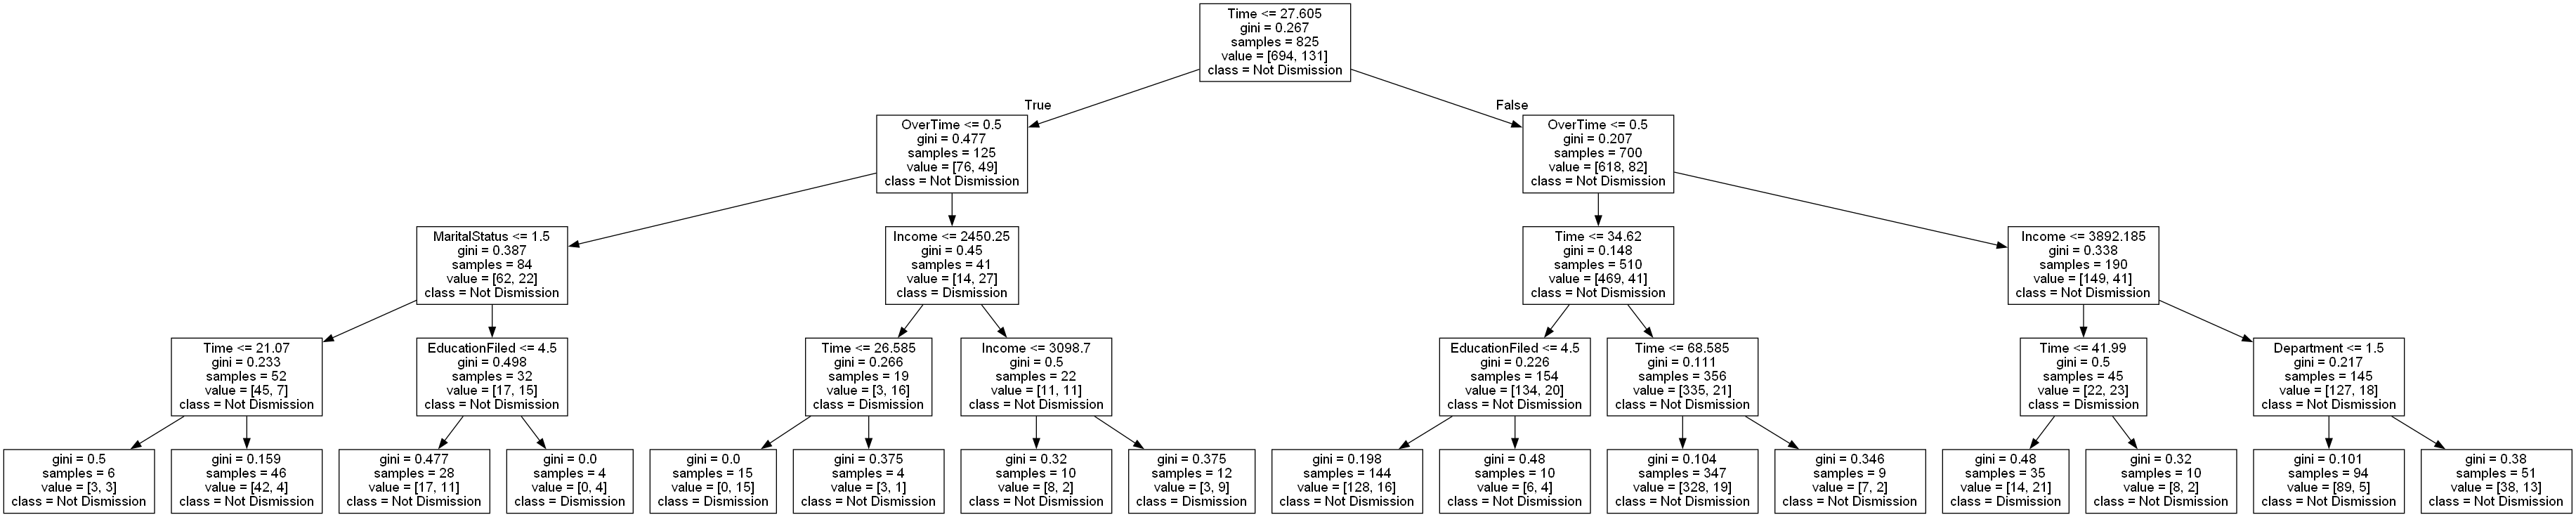

In [16]:
#生成并显示决策树图

#特征
featureName =['BusinessTravel', 'Department', 'EducationFiled','Gender','JobRole','MaritalStatus','OverTime','Income','Time']
className = ['Not Dismission','Dismission']

#导入图类
from graphviz import Source
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=featureName,class_names=className))

#保存到文件中并显示
png_bytes = graph.pipe(format='png')
with open('dectree.png','wb') as f:
    f.write(png_bytes)
from IPython.display import Image  #导入显示图类
Image(png_bytes)

### 生成决策树pdf

In [17]:
import graphviz

featureName =['BusinessTravel', 'Department', 'EducationFiled','Gender','JobRole','MaritalStatus','OverTime','Income','Time']
className = ['Not Dismission','Dismission']
dot_data=tree.export_graphviz(clf,out_file=None, feature_names=featureName,class_names=className)
graph=graphviz.Source(dot_data)
graph.render("mytree1")

'mytree1.pdf'

In [18]:
#绘制ROC曲线
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc

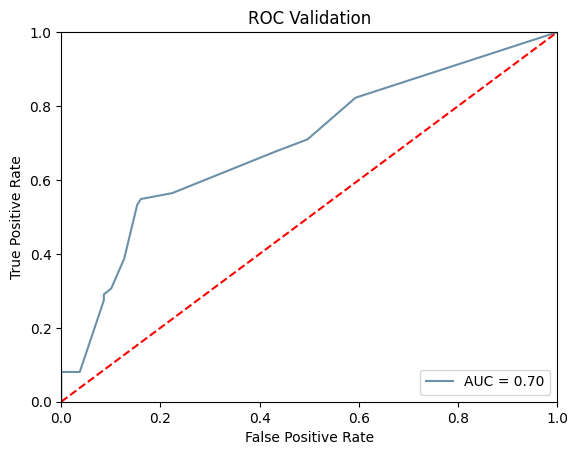

In [22]:
prob_predict_y_validation =clf.predict_proba(X_test)
predictions_validation = prob_predict_y_validation[:, 1]
fpr, tpr, _ = roc_curve(y_test, predictions_validation)
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation')
plt.plot(fpr, tpr, '#6b90a7', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
